#Task: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

In [1]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

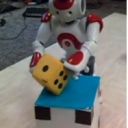

In [2]:
from IPython.display import Image
Image(filename='NAORelease.jpg')

In [20]:
from skimage import io
image = io.imread('NAORelease.jpg')
print image.shape

(128, 128, 3)


(128, 128)


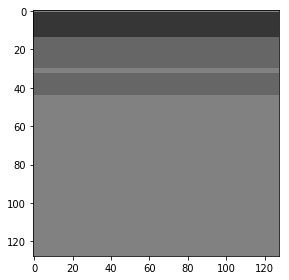

In [355]:
from scipy.spatial import distance
import operator
def initCentroid(im, k):
    centroids = np.zeros((k, im.shape[1]))
    randIn = np.random.permutation(im.shape[0])[np.newaxis]
    centroids = im[randIn[0][:k],:]
    return centroids

def assignCentroid(im_, centroids_):
    x = np.zeros(4)
    k_ = centroids_.shape[0]
    idx = np.zeros(im_.shape[0])
    for i in range(1, im_.shape[0]):
        distances = np.zeros(k_)
        for j in range(k_):
            if not np.isnan(centroids_[j,:][np.newaxis][0][0]):
                distances[j] = euclidean_distances(im_[i,:][np.newaxis], centroids_[j,:][np.newaxis])   
            idx[i], val = min(enumerate(distances), key=operator.itemgetter(1))

    #print idx.round(1)
    return idx

def computeCentroid(im, idx, k):
    n = im.shape[1]
    centroids = np.zeros((k, n))
    for i in range(k):
        centroids[i,:]=np.mean(im[np.where(idx==i), :])
        #print centroids
    return centroids

def runKmeans(im, init_C, iterations):
    m = im.shape[0]
    K = I.shape[0]
    c_ = initCentroid(im, 4)
    ix = np.zeros(m)
    
    for i in range(iterations):
        ix = assignCentroid(im, c_)
        c_ = computeCentroid(im, ix, K)
    return c_, ix

im1 = io.imread('NAORelease.jpg', 'RGB')
# img = img / 255
# imgSize = img.shape

I = initCentroid(im1, 3)
C, i = runKmeans(im1, I, 4)
cd = list()
for x_ in i:
    cd.append(int(x_))
compressed_img = C[cd,:]
print compressed_img.shape
compressed_img = np.reshape(compressed_img, (im1.shape))
final = io.imshow(compressed_img)

Citation: http://benfradet.github.io/blog/2014/09/19/Using-KMeans-for-image-compression